# Kalman filtering

references

* G. Welt and G. Bishop, [An introduction to the Kalman Filter](https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf)
* AndrewStraw, Bill Tubbs, SciPy Cookbook, [kalman filtering section](https://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html)
* dlm package, [an R package for Bayesian analysis of DynamicLinear Models](https://cran.r-project.org/web/packages/dlm/vignettes/dlm.pdf)

In [1]:
library(dlm)
set.seed(952)

## Process

\begin{align}
y_t &= F_t \theta_t + v_t, & v_t \sim N(0, V_t) \\
\theta_t &= G_t \theta_{t-1} + w_t, & w_t \sim N(0, W_t)
\end{align}

in terms of the references,

\begin{align}
x_k &= A_{k-1} + B u_{k-1} + w_{k-1}, & w_{k-1} \sim N(0, Q) \\
z_k &= H x_k + v_k, & v_k \sim N(0, R)
\end{align}

### Estimating a random constant

\begin{align}
x_k &= x_{k-1} + w_k \\
z_k &= x_{k} + v_k
\end{align}

In [2]:
y_truth <- -0.37727
y <- rnorm(100, mean = y_truth, sd = 0.1)

#### Filtering

In [3]:
model <- dlm(FF = 1, V = 0.1**2, GG = 1, W = 1e-5, m0 = 0, C0 = 0.1**2)
theta_filtered <- dlmFilter(y, model)

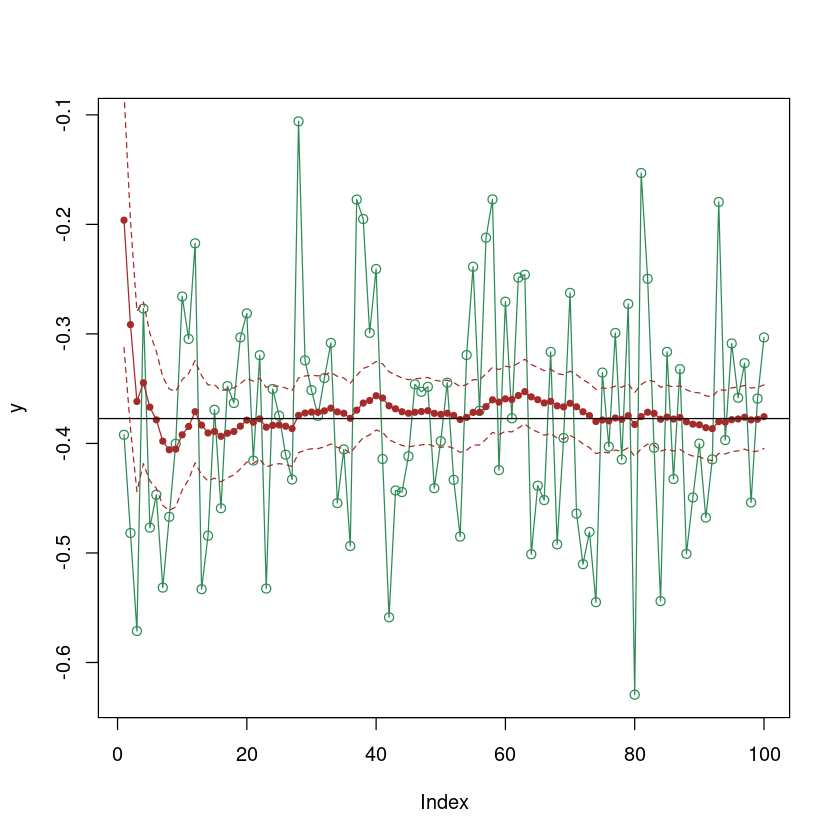

In [4]:
plot(y, type = "o", col = "seagreen")
lines(dropFirst(theta_filtered$m), type = "o", pch = 20, col = "brown")
abline(h = y_truth)
v <- unlist(dlmSvd2var(theta_filtered$U.C, theta_filtered$D.C))
pl <- dropFirst(theta_filtered$m) + qnorm(0.05, sd = sqrt(v[-1]))
pu <- dropFirst(theta_filtered$m) + qnorm(0.95, sd = sqrt(v[-1]))
lines(pl, lty = 2, col = "brown")
lines(pu, lty = 2, col = "brown")

#### Smoothing

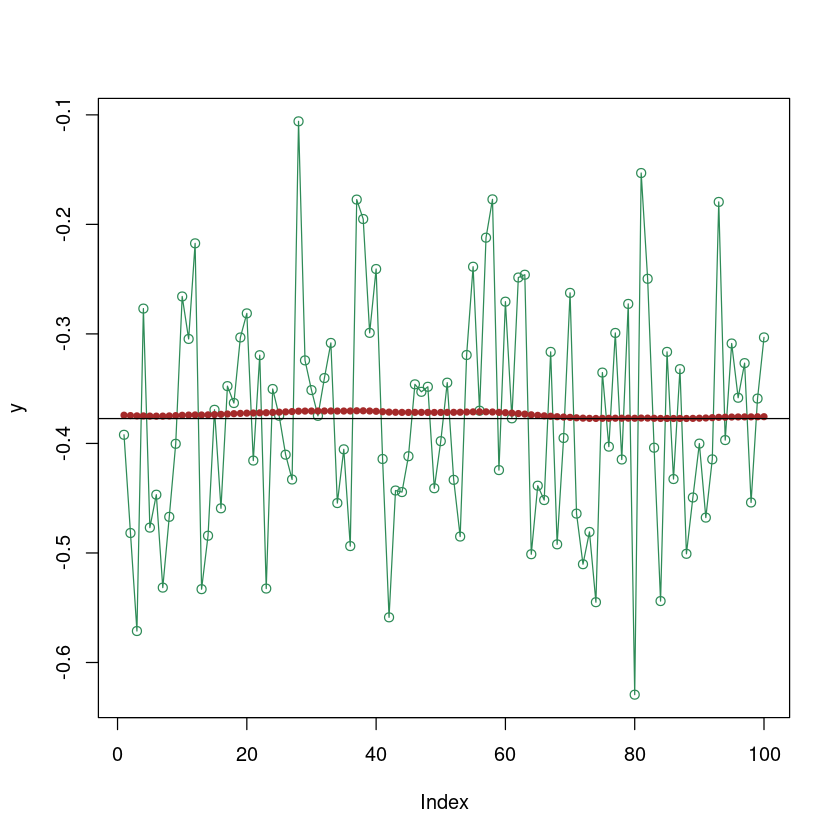

In [5]:
theta_smoothed <- dlmSmooth(theta_filtered)
plot(y, type = "o", col = "seagreen")
lines(dropFirst(theta_smoothed$s), type = "o", pch = 20, col = "brown")
abline(h = y_truth)